In [43]:
from utils import *
from helpers import *
import pandas as pd
from params import *
import os

In [2]:
[sum(row) for i, row in enumerate(OD_MATRIX) if i not in FLEX_STOPS]

[16.5, 13.5, 10.0, 3.5]

In [3]:
hourly_fixed_demand = sum([sum(row) for i, row in enumerate(OD_MATRIX) if i not in FLEX_STOPS])
hourly_flex_demand = sum([sum(row) for i, row in enumerate(OD_MATRIX) if i in FLEX_STOPS])
pct_fixed = round(hourly_fixed_demand/(hourly_fixed_demand + hourly_flex_demand)*100, 2)
pct_flex = round(hourly_flex_demand/(hourly_fixed_demand + hourly_flex_demand)*100, 2)
print(f'100% demand: {hourly_fixed_demand + hourly_flex_demand}')
print(f'Fixed demand: {hourly_fixed_demand} ({pct_fixed} %)')
print(f'Flex demand: {hourly_flex_demand} ({pct_flex} %)')

100% demand: 54.0
Fixed demand: 43.5 (80.56 %)
Flex demand: 10.5 (19.44 %)


In [5]:
# get_heatmap(OD_MATRIX, "OD Matrix")

In [3]:
# plot_min_pax_threshold(DEFAULT_MIN_PAX_THRESHOLDS)

In [4]:
# 
# plot_exponential_decay_by_factor()

In [5]:
# from objects import RouteManager, EventManager
# route = RouteManager()
# event = EventManager()
# event.start_vehicles(route)
# route.load_all_pax()

### calibrate DSD

In [ ]:
tstamp = '1105-113402'
RESULTS_PATH = os.path.join(OUTPUT_FOLDER_PATH,'DRD_calibration_experiments_'+tstamp)
table, table_pcts = tabulate_improvements(RESULTS_PATH, ON_TIME_BOUNDS, base_scenario='DRD_param_1', 
                                          flex_stops=FLEX_STOPS, start_time=RESULTS_START_TIME_MINUTES*60, end_time=RESULTS_END_TIME_MINUTES*60)

In [10]:
table

,idle_time,wait_time,headway_cv,load,n_denied_riders,fixed_ridership,flex_ridership,tot_ridership,n_trips,on_time_trips,avg_delay,n_deviations,avg_reward,avg_episode_reward,on_time_rate,served_rate
scenario,,,,,,,,,,,,,,,,
DRD_param_0,2.37,309.0,0.194,3.42,764,6296,788,7084,914,673,65.0,451,-1.467,-51.500,73.63,50.77
DRD_param_1,2.87,314.0,0.224,3.40,786,6375,761,7136,919,725,61.0,426,-1.367,-47.300,78.89,49.19
DRD_param_2,2.97,313.0,0.200,3.33,834,6415,647,7062,920,753,51.0,397,-1.361,-45.633,81.85,43.69
DRD_param_3,2.88,305.0,0.168,3.39,807,6381,701,7082,918,777,45.0,407,-1.273,-42.933,84.64,46.49
DRD_param_4,3.07,303.0,0.170,3.36,848,6468,621,7089,919,798,40.0,370,-1.261,-41.700,86.83,42.27


### all scenarios

In [5]:
# rename_scenarios = {
#     'SD': 'FRD',
#     'DSD': 'DRD',
#     'RL': 'RL',
#     'RA': 'RA',
#     'AD': 'AD',
#     'ND': 'ND'
# }
# for df in [state, idle, pax, trips]:
#     df['scenario'] = df['scenario'].map(rename_scenarios)

In [52]:
tstamp = '1105-123328'
RESULTS_PATH = os.path.join(OUTPUT_FOLDER_PATH,'experiments_'+tstamp)
table, table_pcts = tabulate_improvements(RESULTS_PATH, ON_TIME_BOUNDS, base_scenario='ND', 
                                          flex_stops=FLEX_STOPS, start_time=RESULTS_START_TIME_MINUTES*60, 
                                          end_time=RESULTS_END_TIME_MINUTES*60)

In [45]:
idle, pax, state, trips = read_results(RESULTS_PATH)

Text(0, 0.5, 'Average delay (s)')

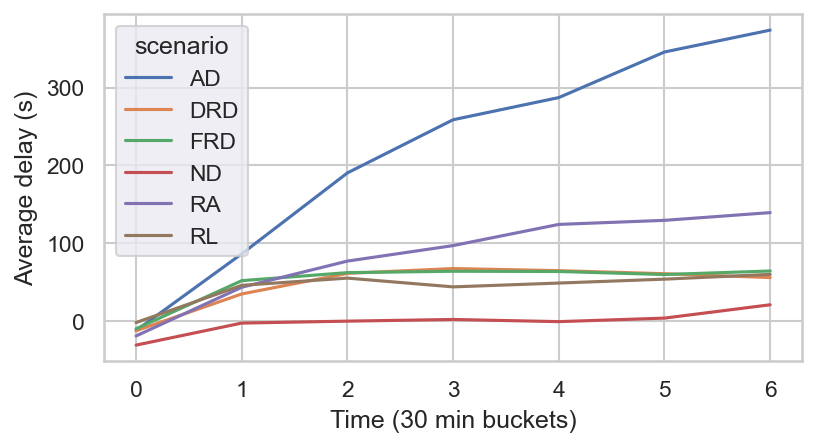

In [61]:
## get evolution of delay overtime by scenario with 30 minute buckets
tmp_trips = trips[['scenario', 'arrival_time', 'delay','bucket']].copy()
## remove maximum bucket
tmp_trips = tmp_trips[tmp_trips['bucket'] < MAX_TIME_HOURS*3600 // 30*60]

fig, axs = plt.subplots(figsize=(6,3))
sns.set_style('darkgrid')
sns.lineplot(data=tmp_trips.groupby(['scenario', 'bucket']).agg({'delay': 'mean'}).reset_index(), x='bucket', y='delay', hue='scenario', ax=axs)
axs.set_xlabel('Time (30 min buckets)')
axs.set_ylabel('Average delay (s)')

In [50]:
# table, table_pcts = tabulate_improvements(state, idle, pax, trips, ON_TIME_BOUNDS, base_scenario='ND', flex_stops=FLEX_STOPS)

In [53]:
table

,idle_time,wait_time,headway_cv,load,n_denied_riders,fixed_ridership,flex_ridership,tot_ridership,n_trips,on_time_trips,avg_delay,n_deviations,avg_reward,avg_episode_reward,on_time_rate,served_rate
scenario,,,,,,,,,,,,,,,,
AD,1.68,387.0,0.567,3.83,478,6244,1105.0,7349,889,360,227.0,891,-2.404,-71.400,40.49,69.80
DRD,2.87,314.0,0.224,3.40,786,6375,761.0,7136,919,725,61.0,426,-1.367,-47.300,78.89,49.19
FRD,1.86,305.0,0.180,3.47,770,6414,744.0,7158,913,728,64.0,517,-1.380,-45.867,79.74,49.14
ND,10.06,301.0,0.169,2.90,1462,6283,NaN,6283,931,857,1.0,0,-1.722,-58.600,92.05,0.00
RA,4.45,328.0,0.355,3.43,854,6286,682.0,6968,918,622,91.0,483,-1.869,-60.867,67.76,44.40
RL,2.50,309.0,0.206,3.31,898,6222,666.0,6888,919,793,51.0,471,-1.312,-44.600,86.29,42.58


## finetune reward weights for trade-off type rewards

TODO: Pareto optimality between competing objectives??

In [54]:
def plot_avg_reward_per_scenario(rewards_per_scenario: pd.Series, axs):
    # Sort by average reward
    rewards_per_scenario = rewards_per_scenario.sort_values(by='scenario')

    # Create whisker plot
    # axs.boxplot(rewards_per_scenario, vert=False, patch_artist=True,
    #             boxprops=dict(facecolor='skyblue', color='black'),
    #             whiskerprops=dict(color='black'), capprops=dict(color='black'),
    #             medianprops=dict(color='red'))
    sns.boxplot(x='total_w_reward', y='scenario', data=rewards_per_scenario, ax=axs)
    
    # Set the y-tick labels with the scenario names
    # axs.set_yticks(range(1, len(rewards_per_scenario) + 1))  # Set the positions for each scenario
    # axs.set_yticklabels(rewards_per_scenario.index)  # Set each label to the scenario names
    # axs.set_xlabel('Average Reward')
    # axs.set_title('Average Reward per Scenario')

# Example usage with sample data
# Assuming rewards_per_scenario is a Series where the index is scenario names and values are rewards
# fig, ax = plt.subplots(figsize=(4, 3))
# plot_avg_reward_per_scenario(rewards_per_scenario, ax)
# plt.show()

def get_avg_weighted_rewards(rewards_per_step: pd.DataFrame, weights: list,
                             reward_fields: list):
    rewards = rewards_per_step.copy()
    rewards['total_w_reward'] = 0
    for i, field in enumerate(reward_fields):
        rewards['total_w_reward'] -= rewards[field] * weights[i]
    episode_reward = rewards.groupby(['scenario', 'episode'])['total_w_reward'].sum().reset_index()
    # episode_reward = episode_reward.groupby(['scenario']).mean()
    return episode_reward

def plot_reward_weights_comparison(state: pd.DataFrame, weights_set: list):
    width_per_ax = 2.5
    height = 2.3
    n_weights = len(weights_set)
    fig, axs = plt.subplots(ncols=n_weights, figsize=(n_weights*width_per_ax, height))
    reward_fields = ['denied', 'early', 'late']
    tmp_state = state[['scenario', 'episode'] + reward_fields].copy()
    for i, weights in enumerate(weights_set):
        tmp_rew = get_avg_weighted_rewards(tmp_state, weights, reward_fields)
        if n_weights > 1:
            plot_avg_reward_per_scenario(tmp_rew, axs[i])
            axs[i].set_title(f'Weights: {weights}')
        else:
            plot_avg_reward_per_scenario(tmp_rew, axs)
            axs.set_title(f'Weights: {weights}')


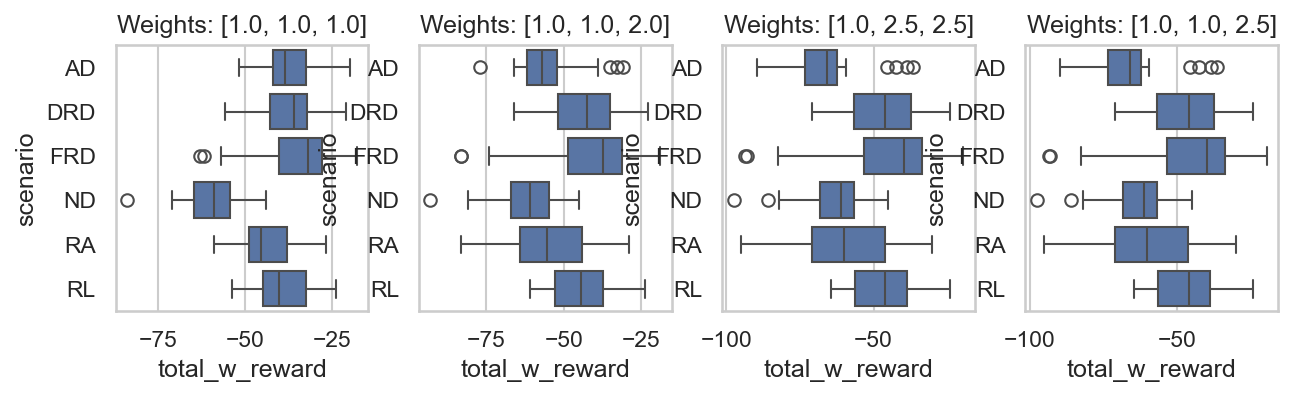

In [60]:
weights = [[1.0,1.0,1.0], [1.0,1.0,2.0], [1.0,2.5,2.5], [1.0,1.0,2.5]]
plot_reward_weights_comparison(state, weights)

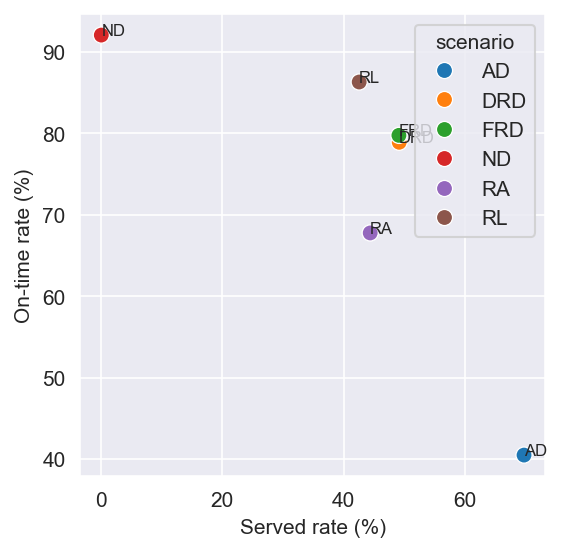

In [58]:
fig, axs = plt.subplots(figsize=(4,4))
## make background of axis dark
sns.set_style("darkgrid")
sns.scatterplot(data=table, x='served_rate', y='on_time_rate', hue='scenario', ax=axs, s=60)
axs.set_xlabel('Served rate (%)')
axs.set_ylabel('On-time rate (%)')
## set legend outside of plot
# axs.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# x_line, y_line = 35, 80
## add legend labels to dots
for i, txt in enumerate(table.index):
    axs.annotate(txt, (table['served_rate'][i], table['on_time_rate'][i]), fontsize=8)
# axs.axvline(x=x_line, color='r', linestyle='--')
# axs.axhline(y=y_line, color='r', linestyle='--')


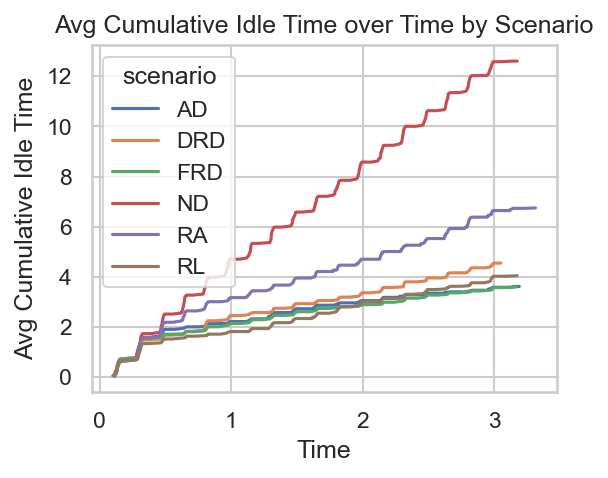

In [59]:
idle_for_plot = idle.copy()
idle_for_plot['idle_time'] = idle_for_plot['idle_time']/60/60
idle_for_plot['time'] = idle_for_plot['time']/60/60
plot_cumulative_idle_time(idle_for_plot)

## debugging

In [1]:
from objects import RouteManager, EventManager

route = RouteManager()
event = EventManager()
event.start_vehicles(route)
route.load_all_pax()

obs, reward, terminated, truncated, info = event.step(route, action=None)
# while not terminated:
#     obs, reward, terminated, truncated, info = event.step(route, action=True)

In [ ]:
event.timestamps[-1]

In [ ]:
pax.groupby(['origin', 'destination']).size().reset_index()

In [ ]:
for direction in ('in', 'out'):
    for s in route.stops[direction]:
        if s.active_pax:
            print([(direction, p.origin, p.destination, p.arrival_time) for p in s.active_pax])